# HW2_Albert_Lee

### 1.	(20 pts) Calculate Gini and Entropy for each node/leaf in the decision tree below.  The answers are there so this should be straight forward.

In [1]:
import numpy as np

In [2]:
def get_gini(value):
    gini = 0
    sum_value = np.sum(value)
    if sum_value != 0:
        for i in range(0, len(value)):
            p_i = value[i] / sum_value
            gini += (p_i * (1 - p_i))
        
    return gini

In [3]:
def get_entropy(val):
    entropy = 0
    sum_val = np.sum(val)
    if sum_val != 0:
        for i in range(0, len(val)):
            if val[i] != 0:
                p_j = val[i] / sum_val
                entropy += p_j * np.log2(p_j)
    
    if entropy != 0:
        entropy = (-1) * entropy
    
    return entropy

**Answer:**

In [4]:
v_root = [50, 50, 50]
v_node_up = [50, 0, 0]
v_node_down = [0, 50, 50]
v_leaf_up = [0, 49, 5]
v_leaf_down = [0, 1, 45]

print('Gini (Root) = ', round(get_gini(v_root), 3))
print('Gini (Orange Node) = ', round(get_gini(v_node_up), 3))
print('Gini (White Node) = ', round(get_gini(v_node_down), 3))
print('Gini (Green Leaf) = ', round(get_gini(v_leaf_up), 3))
print('Gini (Purple Leaf) = ', round(get_gini(v_leaf_down), 3))
print('\n')
print('Entropy (Root) = ', round(get_entropy(v_root), 3))
print('Entropy (Orange Node) = ', round(get_entropy(v_node_up), 3))
print('Entropy (White Node) = ', round(get_entropy(v_node_down), 3))
print('Entropy (Green Leaf) = ', round(get_entropy(v_leaf_up), 3))
print('Entropy (Purple Leaf) = ', round(get_entropy(v_leaf_down), 3))

Gini (Root) =  0.667
Gini (Orange Node) =  0.0
Gini (White Node) =  0.5
Gini (Green Leaf) =  0.168
Gini (Purple Leaf) =  0.043


Entropy (Root) =  1.585
Entropy (Orange Node) =  0.0
Entropy (White Node) =  1.0
Entropy (Green Leaf) =  0.445
Entropy (Purple Leaf) =  0.151


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import*
from sklearn.model_selection import GridSearchCV, train_test_split

### 2.	(20 pts) Perform sklearn grid search cv with decision tree estimator to find the “best” hyperparameter configuration. Use data generated by the code below.  

In [6]:
def make_data(N, err=1.0, rseed=1):
    # randomly sample the data
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

In [7]:
X, y = make_data(1000)

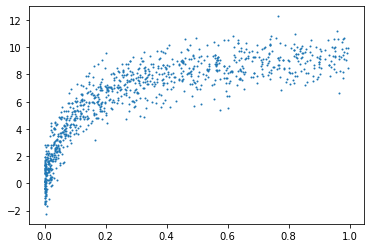

In [8]:
plt.scatter(X, y, s=1) #Just to check what the data look like

#### a.	Do you need a regressor or classification model?

**Answer:** I need a regressor because I need to estimate a specific value of Y

#### b.	Hyperparameters are max_depth 1 through 10.

In [9]:
#Peforming cross-validation and training with 80% of data and test with 20% of the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
hyper_param = {'max_depth': np.arange(1, 11)}

In [10]:
grid = GridSearchCV(estimator=DecisionTreeRegressor(), param_grid=hyper_param, cv=5)
grid.get_params()

{'cv': 5,
 'error_score': 'raise-deprecating',
 'estimator__criterion': 'mse',
 'estimator__max_depth': None,
 'estimator__max_features': None,
 'estimator__max_leaf_nodes': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_impurity_split': None,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__presort': False,
 'estimator__random_state': None,
 'estimator__splitter': 'best',
 'estimator': DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort=False, random_state=None, splitter='best'),
 'iid': 'warn',
 'n_jobs': None,
 'param_grid': {'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])},
 'pre_dispatch': '2*n_jobs',
 'refit':

In [11]:
grid.fit(X_train, y_train) #I have to use training sets... not all X, y

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=None,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

**Answer:**

In [12]:
#best hyperparameter determined by gridsearch cv

print('Best Hyperparameter :', grid.best_params_)

Best Hyperparameter : {'max_depth': 4}


#### c.	Plot the actual values and predicted values.  For predicted values, you will need to define X values to predict on.

In [13]:
best_tree = grid.best_estimator_

In [14]:
y_predicted = best_tree.fit(X_train, y_train).predict(X_test) # I had to fit the data again with the best model...

In [15]:
#to show a table of predicted y and actual y
my_table = pd.DataFrame(data=X_test, columns=['X_test'])
my_table['y_test(actual)'] = y_test
my_table['y_predicted'] = y_predicted

my_table.sort_values(by=['X_test'], inplace=True)

my_table.head() #sorted by x value in an acsending order

,X_test,y_test(actual),y_predicted
133,1.308160e-08,0.814344,0.372957
173,9.108062e-06,-0.727439,0.372957
57,1.439195e-05,-0.080131,0.372957
32,7.990755e-05,0.371562,0.372957
107,1.725639e-04,0.774555,0.372957


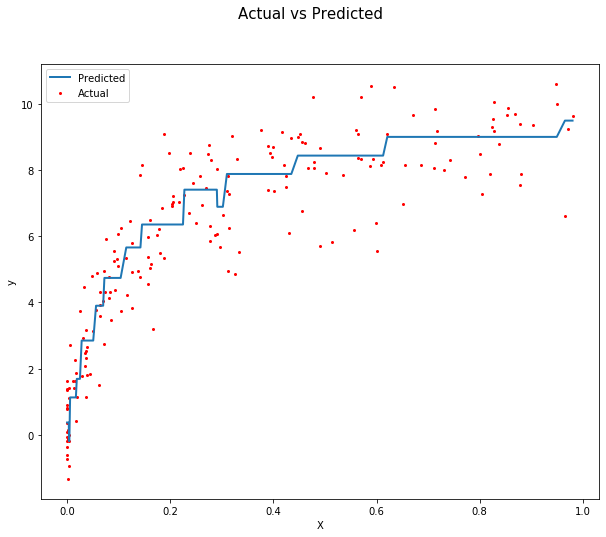

In [16]:
fig, ax = plt.subplots(sharex=True, figsize=(10,8));
fig.suptitle('Actual vs Predicted', fontsize=15);
ax.scatter(my_table['X_test'], my_table['y_test(actual)'], c='red', s=4, label='Actual');
ax.plot(my_table['X_test'],  my_table['y_predicted'], lw=2, label='Predicted');
ax.legend(loc='upper left');
ax.set_xlabel('X');
ax.set_ylabel('y');

#### d.	Why doesn’t max_depth = 10 give the “best” estimate?

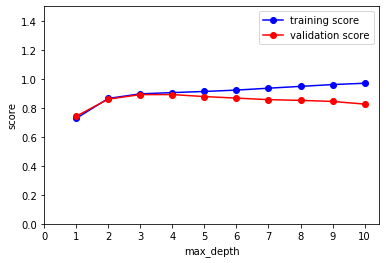

In [17]:
from sklearn.model_selection import validation_curve

max_depth = np.arange(1, 11);
train_score, val_score = validation_curve(DecisionTreeRegressor(), X_train, y_train, param_name='max_depth', param_range=max_depth, cv=5);
plt.plot(max_depth, np.median(train_score, 1), '-o', color='blue', label='training score');
plt.plot(max_depth, np.median(val_score, 1), '-o', color='red', label='validation score');
plt.legend(loc='best');
plt.ylim(0, 1.5);
plt.xlabel('max_depth');
plt.ylabel('score');
plt.xticks(np.arange(0, 11, 1));
plt.show()

**Answer:** As max_depth gets bigger than 4, validation score keeps going lower, which mean high variance (overfitting). the variance for max_depth 10 is the highest (overfitting) 

### 3.	(40 pts) Define the target variable as whether ticker XLF goes up or down the next day.  Define features to be the return of all tickers (including XLF) the day before. Train the Random Forest model using 252 days as the training set and the last 50 days as the test set (this means that you will use the last 303 samples of the data set). Set the RF to the default parameters and vary the number of estimators: 5, 50, 100, 300.  Calculate the accuracy on the test set for each set of hyperparameters. 

In [18]:
df = pd.read_csv('Data.csv', index_col=['Date'])
df.head()

,AGG,TLT,IEF,LQD,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY,EFA,EWJ,EWW,EWY,EZU
Date,,,,,,,,,,,,,,,,,,
9/18/2017,109.860001,126.129997,107.269997,120.900002,56.380001,66.120003,25.059999,69.779999,58.790001,55.299999,54.189999,82.570000,89.320000,68.150002,55.250000,55.910000,69.839996,43.080002
9/19/2017,109.800003,125.820000,107.150002,120.970001,56.669998,66.389999,25.250000,69.849998,59.049999,55.130001,54.080002,81.919998,89.239998,68.470001,55.570000,55.650002,70.070000,43.290001
9/20/2017,109.709999,125.910004,106.940002,120.820000,56.869999,66.839996,25.400000,70.360001,58.810001,54.599998,53.680000,82.000000,89.540001,68.320000,55.590000,55.860001,69.699997,43.080002
9/21/2017,109.690002,125.839996,106.800003,120.820000,56.750000,66.860001,25.459999,70.570000,58.490002,54.080002,53.669998,81.580002,89.389999,68.180000,55.369999,55.730000,69.690002,43.110001
9/22/2017,109.769997,126.199997,106.989998,120.980003,56.549999,67.199997,25.430000,70.750000,58.520000,53.919998,53.230000,81.580002,89.540001,68.389999,55.430000,55.990002,69.330002,43.200001


In [19]:
print(df.shape)

(502, 18)


In [20]:
#get return
df_return = df.pct_change(1)
df_return.head()

,AGG,TLT,IEF,LQD,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY,EFA,EWJ,EWW,EWY,EZU
Date,,,,,,,,,,,,,,,,,,
9/18/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9/19/2017,-0.000546,-0.002458,-0.001119,0.000579,0.005144,0.004083,0.007582,0.001003,0.004422,-0.003074,-0.002030,-0.007872,-0.000896,0.004696,0.005792,-0.004650,0.003293,0.004875
9/20/2017,-0.000820,0.000715,-0.001960,-0.001240,0.003529,0.006778,0.005941,0.007301,-0.004064,-0.009614,-0.007396,0.000977,0.003362,-0.002191,0.000360,0.003774,-0.005280,-0.004851
9/21/2017,-0.000182,-0.000556,-0.001309,0.000000,-0.002110,0.000299,0.002362,0.002985,-0.005441,-0.009524,-0.000186,-0.005122,-0.001675,-0.002049,-0.003958,-0.002327,-0.000143,0.000696
9/22/2017,0.000729,0.002861,0.001779,0.001324,-0.003524,0.005085,-0.001178,0.002551,0.000513,-0.002959,-0.008198,0.000000,0.001678,0.003080,0.001084,0.004665,-0.005166,0.002088


In [21]:
#get actual values of target_XLF and add it to the last column
df_return['target_XLF'] = df_return['XLF'] > 0 #True if return is greater than 0
df_return.target_XLF.replace(True, 1, inplace=True)
df_return.head()

,AGG,TLT,IEF,LQD,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY,EFA,EWJ,EWW,EWY,EZU,target_XLF
Date,,,,,,,,,,,,,,,,,,,
9/18/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
9/19/2017,-0.000546,-0.002458,-0.001119,0.000579,0.005144,0.004083,0.007582,0.001003,0.004422,-0.003074,-0.002030,-0.007872,-0.000896,0.004696,0.005792,-0.004650,0.003293,0.004875,1.0
9/20/2017,-0.000820,0.000715,-0.001960,-0.001240,0.003529,0.006778,0.005941,0.007301,-0.004064,-0.009614,-0.007396,0.000977,0.003362,-0.002191,0.000360,0.003774,-0.005280,-0.004851,1.0
9/21/2017,-0.000182,-0.000556,-0.001309,0.000000,-0.002110,0.000299,0.002362,0.002985,-0.005441,-0.009524,-0.000186,-0.005122,-0.001675,-0.002049,-0.003958,-0.002327,-0.000143,0.000696,1.0
9/22/2017,0.000729,0.002861,0.001779,0.001324,-0.003524,0.005085,-0.001178,0.002551,0.000513,-0.002959,-0.008198,0.000000,0.001678,0.003080,0.001084,0.004665,-0.005166,0.002088,0.0


In [22]:
df_return.shape

(502, 19)

In [23]:
#preparation for train data
df_train = df_return.iloc[199:452:]
df_train.head()

,AGG,TLT,IEF,LQD,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY,EFA,EWJ,EWW,EWY,EZU,target_XLF
Date,,,,,,,,,,,,,,,,,,,
7/3/2018,0.002076,0.005356,0.002543,0.003677,-0.001731,0.006282,-0.008982,-0.003204,-0.011842,0.002342,0.002866,0.002389,-0.005025,0.003014,-0.001228,0.030686,-0.007399,0.003677,0.0
7/5/2018,0.000942,0.002869,0.000098,0.003140,0.008672,-0.001063,0.002266,0.004891,0.014150,0.013827,0.005335,0.010367,0.004959,0.009916,-0.001581,0.047720,-0.002282,0.017827,1.0
7/6/2018,0.001035,0.003269,0.000878,0.001391,0.004986,0.006116,0.004898,0.003477,0.011674,0.003073,0.007771,0.014389,0.007858,0.005356,0.006511,0.016324,0.008690,0.005998,1.0
7/9/2018,-0.000940,-0.006436,-0.002534,0.000695,0.008896,0.014933,0.022872,0.018570,0.007599,-0.003830,-0.030844,0.007325,0.011967,0.009618,0.013811,-0.000397,0.014510,0.005724,1.0
7/10/2018,-0.000752,-0.000082,-0.000782,-0.001128,0.008479,0.007422,-0.003666,0.003129,0.002374,0.011918,0.009509,0.003809,0.002150,-0.000440,-0.003794,0.009919,-0.001490,0.002846,0.0


In [24]:
#assign x_train values as returns of all tickers the day before target_XLF 
x_train = df_train.iloc[0:252:,0:18:] 
x_train.head()

,AGG,TLT,IEF,LQD,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY,EFA,EWJ,EWW,EWY,EZU
Date,,,,,,,,,,,,,,,,,,
7/3/2018,0.002076,0.005356,0.002543,0.003677,-0.001731,0.006282,-0.008982,-0.003204,-0.011842,0.002342,0.002866,0.002389,-0.005025,0.003014,-0.001228,0.030686,-0.007399,0.003677
7/5/2018,0.000942,0.002869,0.000098,0.003140,0.008672,-0.001063,0.002266,0.004891,0.014150,0.013827,0.005335,0.010367,0.004959,0.009916,-0.001581,0.047720,-0.002282,0.017827
7/6/2018,0.001035,0.003269,0.000878,0.001391,0.004986,0.006116,0.004898,0.003477,0.011674,0.003073,0.007771,0.014389,0.007858,0.005356,0.006511,0.016324,0.008690,0.005998
7/9/2018,-0.000940,-0.006436,-0.002534,0.000695,0.008896,0.014933,0.022872,0.018570,0.007599,-0.003830,-0.030844,0.007325,0.011967,0.009618,0.013811,-0.000397,0.014510,0.005724
7/10/2018,-0.000752,-0.000082,-0.000782,-0.001128,0.008479,0.007422,-0.003666,0.003129,0.002374,0.011918,0.009509,0.003809,0.002150,-0.000440,-0.003794,0.009919,-0.001490,0.002846


In [25]:
y_train = df_train.iloc[1::,18::]
y_train.head()

,target_XLF
Date,
7/5/2018,1.0
7/6/2018,1.0
7/9/2018,1.0
7/10/2018,0.0
7/11/2018,0.0


In [26]:
#preparation for test data
df_test = df_return.iloc[451:502:]
df_test.head()

,AGG,TLT,IEF,LQD,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY,EFA,EWJ,EWW,EWY,EZU,target_XLF
Date,,,,,,,,,,,,,,,,,,,
7/5/2019,-0.004213,-0.013263,-0.006347,-0.008805,-0.004562,0.001429,0.002849,-0.003984,-0.001873,-0.004358,-0.000494,-0.006886,0.001152,-0.007649,-0.004310,0.002728,-0.006531,-0.008232,1.0
7/8/2019,-0.000540,0.001359,-0.001004,-0.001373,-0.011541,0.001427,-0.004972,-0.008257,-0.007630,0.001347,0.001483,-0.007467,0.001233,-0.005743,-0.005771,0.009977,-0.019204,-0.006288,0.0
7/9/2019,-0.000270,-0.000377,-0.000639,-0.002103,-0.009787,0.000791,0.001784,-0.002212,0.003529,-0.005884,0.001316,0.000967,0.001067,-0.004256,-0.008888,-0.030983,-0.003704,-0.003037,1.0
7/10/2019,0.000721,-0.005507,0.000548,0.002269,-0.002081,0.012810,-0.003563,-0.002347,0.007913,0.006426,0.002301,0.003436,0.003607,0.003511,0.006040,0.000000,0.012925,0.002793,0.0
7/11/2019,-0.003691,-0.013350,-0.004933,-0.005902,0.004344,0.002030,0.005720,0.006796,0.003738,0.002521,0.000328,0.000214,0.002042,-0.000304,0.001819,0.009268,0.004370,-0.001519,1.0


In [27]:
#assign x_test values as returns of all tickers the day before target_XLF 
x_test = df_test.iloc[0:50:,0:18:] 
x_test.head()

,AGG,TLT,IEF,LQD,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY,EFA,EWJ,EWW,EWY,EZU
Date,,,,,,,,,,,,,,,,,,
7/5/2019,-0.004213,-0.013263,-0.006347,-0.008805,-0.004562,0.001429,0.002849,-0.003984,-0.001873,-0.004358,-0.000494,-0.006886,0.001152,-0.007649,-0.004310,0.002728,-0.006531,-0.008232
7/8/2019,-0.000540,0.001359,-0.001004,-0.001373,-0.011541,0.001427,-0.004972,-0.008257,-0.007630,0.001347,0.001483,-0.007467,0.001233,-0.005743,-0.005771,0.009977,-0.019204,-0.006288
7/9/2019,-0.000270,-0.000377,-0.000639,-0.002103,-0.009787,0.000791,0.001784,-0.002212,0.003529,-0.005884,0.001316,0.000967,0.001067,-0.004256,-0.008888,-0.030983,-0.003704,-0.003037
7/10/2019,0.000721,-0.005507,0.000548,0.002269,-0.002081,0.012810,-0.003563,-0.002347,0.007913,0.006426,0.002301,0.003436,0.003607,0.003511,0.006040,0.000000,0.012925,0.002793
7/11/2019,-0.003691,-0.013350,-0.004933,-0.005902,0.004344,0.002030,0.005720,0.006796,0.003738,0.002521,0.000328,0.000214,0.002042,-0.000304,0.001819,0.009268,0.004370,-0.001519


In [28]:
y_test = df_test.iloc[1::,18::]
y_test.head()

,target_XLF
Date,
7/8/2019,0.0
7/9/2019,1.0
7/10/2019,0.0
7/11/2019,1.0
7/12/2019,1.0


In [29]:
x_train = x_train.values
y_train = y_train.values.ravel()
x_test = x_test.values
y_test = y_test.values.ravel()

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [31]:
def get_accuracy_score_rf(n_est, x_train, y_train, x_test, y_test):
    for i in n_est:
        model = RandomForestClassifier(n_estimators=i)
        model.fit(x_train, y_train)
        y_predict = model.predict(x_test)
        print('Accuracy Score for', str(i), 'estimators :', accuracy_score(y_test, y_predict))

**Answer:**

In [32]:
n_estimators = [5, 50, 100, 300]
get_accuracy_score_rf(n_estimators, x_train, y_train, x_test, y_test)

Accuracy Score for 5 estimators : 0.56
Accuracy Score for 50 estimators : 0.58
Accuracy Score for 100 estimators : 0.5
Accuracy Score for 300 estimators : 0.42


### 4.	(20 pts) This exercise will illustrate how a small amount of scaled precision can lead to high returns.  In Lecture 5, we will discuss classification metrics such as accuracy, precision and recall. This problem is adapted from Marcos Lopez de Prado text “Advances in Machine Learning”.

#### a. Calculate the expected value of X_i.

$E[X_i]={\pi}p+(-{\pi})(1-p)$<br  />
$~~~~~~={\pi}p-{\pi}+{\pi}p$<br  />
$~~~~~~=2{\pi}p-{\pi}$<br  />
$~~~~~~={\pi}(2p-1)$

#### b. Calculate the variance of X_i.

$E[X^2_i]={\pi}^2p+(-{\pi})^2(1-p)$<br  />
$~~~~~~~~={\pi}^2p+{\pi}^2-{\pi}^2p$<br  />
$~~~~~~~~={\pi}^2$

$Var[X_i]=E[X^2_i]-(E[X_i])^2$<br  />
$~~~~~~~~={\pi}^2-{\pi}^2(2p-1)^2$<br  />
$~~~~~~~~={\pi}^2[1-(2p-1)^2]$<br  />
$~~~~~~~~={\pi}^2(1-4p^2+4p-1)$<br  />
$~~~~~~~~=4{\pi}^2p(1-p)$

#### c. For n iid bets per year, show the annualized Sharpe ratio is: $\frac{2p-1}{2\sqrt{p(1-p)}} \sqrt{n}$.

$X_i{\sim}B(1, p), IID$<br />
$for~n~bets~per~year,$<br />
$Y_n{\sim}B(n, p)$<br />
$Sharpe~ratio({\theta}) =\frac{nE[X_i]}{\sqrt{nVar[X_i]}}$<br />
$~~~~~~~~~~~~~~~~~~~~~~~=\frac{n{\pi}(2p-1)}{\sqrt{4{\pi}^2np(1-p)}}$<br />
$~~~~~~~~~~~~~~~~~~~~~~~=\frac{n{\pi}(2p-1)}{2{\pi}\sqrt{np(1-p)}}$<br />
$~~~~~~~~~~~~~~~~~~~~~~~=\frac{n{\pi}(2p-1)}{2{\pi}\sqrt{n}\sqrt{p(1-p)}}$<br />
$~~~~~~~~~~~~~~~~~~~~~~~=\frac{2p-1}{2\sqrt{p(1-p)}}\sqrt{n}$

#### d. If p is .56, how many bets per year are needed to achieve a Sharpe ratio of at least 2.0?

In [33]:
from sympy import symbols, diff
import numpy as np
import math

In [34]:
def f(x, p, theta):
    return ((2 * p) - 1) / (2 * (p * (1 - p))**(0.5)) * (x**(0.5))  - theta

def getSlope(x_guess, p, theta):
    x = symbols('x')
    return diff(((2 * p) - 1) / (2 * (p * (1 - p))**(.5)) * (x)**(.5)  - theta, x).subs(x, x_guess)

In [35]:
def getLeastNumberBet(p, theta, x_guess):
    
    for i in range(0, 10000):
        x_next = x_guess - f(x_guess, p, theta) / getSlope(x_guess, p, theta)
        if x_next == x_guess:
            break
        else: 
            x_guess = x_next
        
    return x_next       

**Answer:**

In [36]:
sharpe_ratio = 2
p = .56
x_guess = 0.1
answer = getLeastNumberBet(p, sharpe_ratio, x_guess)
print(answer)
print(math.ceil(answer), "bets per year")

273.777777777777
274 bets per year
